   ms     r=6    r=20
    0      94       0
  500     135       0
 1000     190       1
 1500     265       3
 2000     364      13
 2500     490      45
 3000     641     151
 3500     814     445
 4000    1000    1000
 4500    1186    1555
 5000    1359    1849
 5500    1510    1955
 6000    1636    1987
 6500    1735    1997
 7000    1810    1999
 7500    1865    2000
 8000    1906    2000


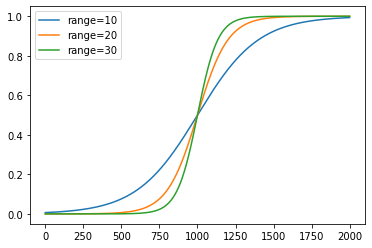

In [1]:
%matplotlib inline
"""
in reference to http://programmers.stackexchange.com/questions/225487/mapping-values-over-a-curve/225503#225503
"""
import numpy as np
import matplotlib.pyplot as plt
import math

MIN_RATING=1
MAX_RATING=2000

MIN_POINTS=1
MAX_POINTS=8000

SIGMOID_RANGE=25

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def map2range(value, low, high, new_low, new_high):
    '''map a value from one range to another'''
    return value * 1.0 / (high - low + 1) * (new_high - new_low + 1)

def map2sigmoid(value, max=SIGMOID_RANGE):
    '''map a value from its rating range to the sigmoid range'''
    return map2range(value, MIN_RATING, MAX_RATING, 1.0, max) - (max / 2.0)

def map2rating(value, max=SIGMOID_RANGE):
    '''map a points value to a rating value using the sigmoid function'''
    rating_range = map2range(value, MIN_POINTS, MAX_POINTS, MIN_RATING, MAX_RATING)
    sigmoid_range = map2sigmoid(rating_range, max=max)
    s = sigmoid(sigmoid_range)
    if s < 0.5:
        r = math.floor(s * MAX_RATING)
    else:
        r = math.ceil(s * MAX_RATING)
    return r

ax = plt.subplot(1,1,1)
x = np.arange(MIN_RATING,MAX_RATING,1);
y = [sigmoid(map2sigmoid(y, max=10)) for y in x]
ax.plot(x, y, label="range=10")
y = [sigmoid(map2sigmoid(y, max=20)) for y in x]
ax.plot(x, y, label="range=20")
y = [sigmoid(map2sigmoid(y, max=30)) for y in x]
ax.plot(x, y, label="range=30")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

print( "%5s %7s %7s" % ("ms", "r=6", "r=20") )
for points in range(0, 8001, 500):
    print("%5d %7.0f %7.0f" % (points, map2rating(points,max=6), map2rating(points, max=20)))